In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
img_array = cv2.imread("C:\\Users\\ROHAN\\Desktop\\CDAC_project\\mrlEyes_2018_01\\Train_dataset\\closed eye\\s0001_00001_0_0_0_0_0_01.png")

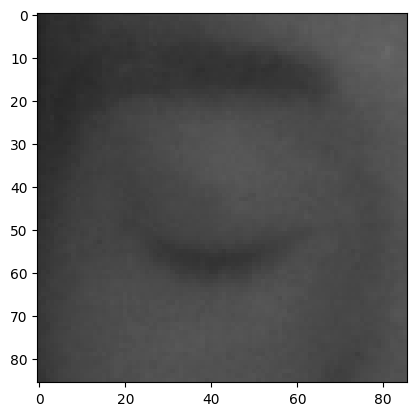

In [6]:
plt.imshow(img_array,cmap="gray")

In [7]:
img_array.shape

(86, 86, 3)

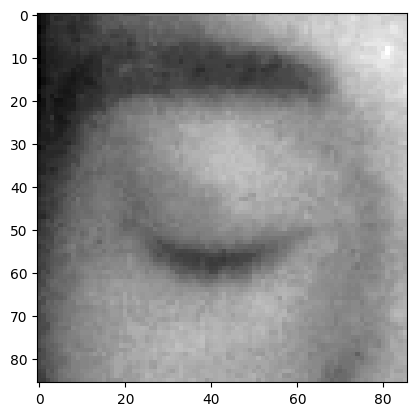

In [8]:
Datadirectory = "C:\\Users\\ROHAN\\Desktop\\CDAC_project\\mrlEyes_2018_01\\Train_dataset\\"
classes = ["closed eye","opened eye"]
for category in classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

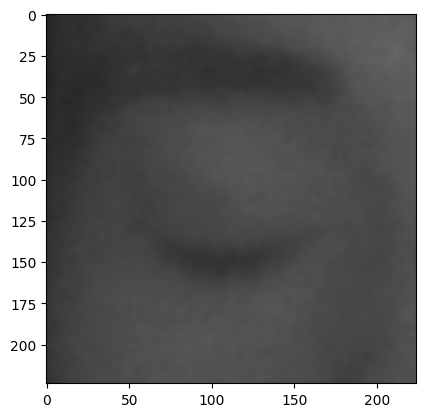

In [9]:
img_size = 224

new_array = cv2.resize(backtorgb,(img_size,img_size))
plt.imshow(new_array, cmap= "gray")
plt.show()

READING ALL THE IMAGES AND CONVERTING THEM INTO AN ARRAY FOR DATA AND LABELS

In [10]:
training_Data = []
def create_training_Data():
    for category in classes:
        path= os.path.join(Datadirectory,category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [11]:
create_training_Data()

In [12]:
print(len(training_Data))

3242


In [13]:
import random
random.shuffle(training_Data)

In [14]:
x = []
y = []
for features, label in training_Data:
    x.append(features)
    y.append(label)
    
x = np.array(x).reshape(-1, img_size , img_size, 3)

In [15]:
x.shape

(3242, 224, 224, 3)

NORMALIZE THE DATA

In [16]:
x=x/255.0;

In [17]:
y = np.array(y)

In [18]:
import pickle

pickle_out = open("x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [19]:
pickle_in = open("x.pickle","rb")
x=pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y=pickle.load(pickle_in)

DEEP LEARNING MODEL FOR TRAINING - TRAINING LEARNING

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [21]:
model = tf.keras.applications.mobilenet.MobileNet()

In [22]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

                                                                 
 conv_pw_4 (Conv2D)          (None, 28, 28, 256)       32768     
                                                                 
 conv_pw_4_bn (BatchNormali  (None, 28, 28, 256)       1024      
 zation)                                                         
                                                                 
 conv_pw_4_relu (ReLU)       (None, 28, 28, 256)       0         
                                                                 
 conv_dw_5 (DepthwiseConv2D  (None, 28, 28, 256)       2304      
 )                                                               
                                                                 
 conv_dw_5_bn (BatchNormali  (None, 28, 28, 256)       1024      
 zation)                                                         
                                                                 
 conv_dw_5_relu (ReLU)       (None, 28, 28, 256)       0         
          

TRANSFER LEARNING

In [23]:
base_input = model.layers[0].input

In [24]:
base_output = model.layers[-4].output

In [25]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [26]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [27]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

SETTINGS FOR BINARY CLASSIFICATION (OPEN/CLOSED)

In [28]:
new_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [29]:
new_model.fit(x,y, epochs=10, validation_split=0.1)

Epoch 1/10


92/92 [==============================] - 186s 2s/step - loss: 0.1625 - accuracy: 0.9472 - val_loss: 0.5561 - val_accuracy: 0.7446
Epoch 2/10
92/92 [==============================] - 187s 2s/step - loss: 0.0451 - accuracy: 0.9822 - val_loss: 0.6087 - val_accuracy: 0.8800
Epoch 3/10
92/92 [==============================] - 160s 2s/step - loss: 0.0319 - accuracy: 0.9887 - val_loss: 0.2706 - val_accuracy: 0.9169
Epoch 4/10
92/92 [==============================] - 184s 2s/step - loss: 0.0431 - accuracy: 0.9835 - val_loss: 0.1849 - val_accuracy: 0.9415
Epoch 5/10
92/92 [==============================] - 286s 3s/step - loss: 0.0479 - accuracy: 0.9829 - val_loss: 0.0789 - val_accuracy: 0.9785
Epoch 6/10
92/92 [==============================] - 224s 2s/step - loss: 0.0145 - accuracy: 0.9952 - val_loss: 0.2656 - val_accuracy: 0.9477
Epoch 7/10
92/92 [==============================] - 146s 2s/step - loss: 0.0102 - accuracy: 0.9962 - val_loss: 0.1068 - val_accuracy: 0.9692
Epoch 8/10


In [56]:
new_model.save('my_model.h5')

c:\Users\ROHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [57]:
new_model = tf.keras.models.load_model('my_model.h5')

In [58]:
from keras.utils import plot_model
plot_model(new_model, to_file= 'model.png', show_shapes= True, show_layer_names= True)
from IPython.display import Image
Image('model.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


FileNotFoundError: No such file or directory: 'model.png'

FileNotFoundError: No such file or directory: 'model.png'

<IPython.core.display.Image object>

CHECK THE NETWORK FOR PREDICTIONS

In [59]:
img_array = cv2.imread('s0001_00155_0_0_0_0_0_01.png',cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb,(img_size,img_size))

In [60]:
x_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [61]:
x_input.shape

(1, 224, 224, 3)

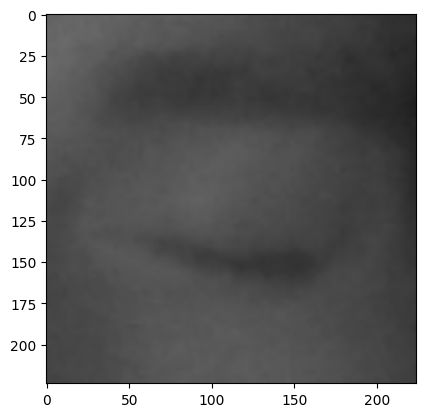

In [62]:
plt.imshow(new_array)

In [63]:
x_input = x_input/255.0

In [64]:
prediction = new_model.predict(x_input)

1/1 [==============================] - 1s 611ms/step


In [65]:
prediction

array([[2.784584e-07]], dtype=float32)

In [66]:
img = cv2.imread('baby.jpg')

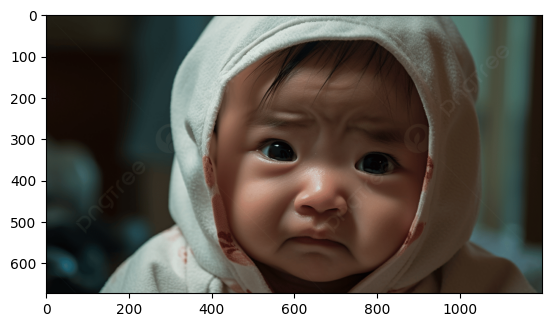

In [67]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [68]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [69]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')

In [70]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [71]:
eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)

In [72]:
for(x, y, w, h) in eyes:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0),2)

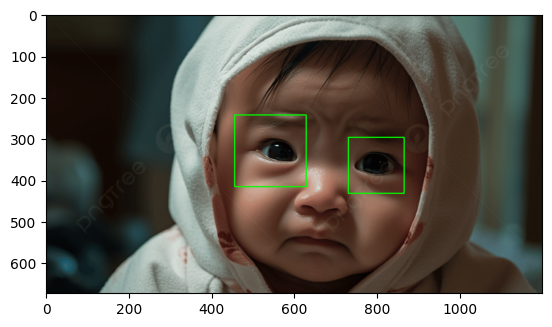

In [73]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

crop the eye image

In [74]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess=eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("eyes are not detected")
    else:
        for(ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey: ey+eh, ex:ex+ew]

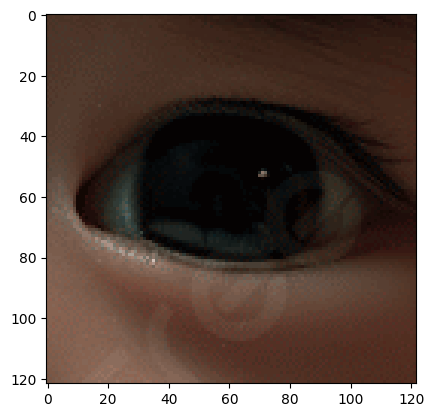

In [75]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [76]:
eyes_roi.shape

(122, 122, 3)

In [77]:
final_image = cv2.resize(eyes_roi,(224,224))
final_image = np.expand_dims(final_image,axis =0)
final_image = final_image/255.0

In [78]:
final_image.shape

(1, 224, 224, 3)

In [79]:
new_model.predict(final_image)

1/1 [==============================] - 0s 164ms/step


array([[0.22589871]], dtype=float32)

In [5]:
%pip install gradio 


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:

import cv2
import gradio as gr
import numpy as np

def detect_drowsiness(frame):
    path = "haarcascade_frontalface_default.xml"
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
    for x, y, w, h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            return "EYES ARE NOT DETECTED"
        else:
            for (ex, ey, ew, eh) in eyess:
                eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]

    final_image = cv2.resize(eyes_roi, (224, 224))
    final_image = np.expand_dims(final_image, axis=0)
    final_image = final_image / 255.0

    predictions = new_model.predict(final_image)
    if predictions > 0.03:
        status = "open eyes"
    else:
        status = "close eyes"

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    return status

webcam = gr.inputs.Image(label="Webcam")

iface = gr.Interface(fn=detect_drowsiness, inputs=webcam, outputs="text", title="Drowsiness Detection")
iface.launch()


ImportError: Pandas requires version '3.1.2' or newer of 'jinja2' (version '3.0.3' currently installed).

REAL TIME VIDEO DEMO

In [84]:
import cv2
path="haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')

cap=cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("CANNOT OPEN WEBCAM")

while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    eyes=eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y),(x+w, y+h),(0,255,0),2)
        eyess =eye_cascade.detectMultiScale(roi_gray)
        if len(eyess)==0:
            print("EYES ARE NOT DETECTED")
            
        else:
            for(ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey:ey+eh, ex:ex + ew]
    
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image,axis=0)
    
    final_image = final_image/255.0
    
    predictions = new_model.predict(final_image)
    if(predictions>0.01):
        status = "open eyes"
    else:
        status = "close eyes"
        
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for(x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w , y+h),(0,255,0),2)
    font = cv2.FONT_HERSHEY_COMPLEX
    
    cv2.putText(frame,status,(50,50),font,3,(0,0,255),2,cv2.LINE_4)
    cv2.imshow('DROWZINESS DETECTION',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
    

1/1 [==============================] - 0s 102ms/step
False
1/1 [==============================] - 0s 107ms/step
False
1/1 [==============================] - 0s 115ms/step
False
1/1 [==============================] - 0s 106ms/step
False
1/1 [==============================] - 0s 107ms/step
False
EYES ARE NOT DETECTED
EYES ARE NOT DETECTED
1/1 [==============================] - 0s 42ms/step
False
1/1 [==============================] - 0s 37ms/step
False
1/1 [==============================] - 0s 39ms/step
False
1/1 [==============================] - 0s 44ms/step
False
EYES ARE NOT DETECTED
1/1 [==============================] - 0s 38ms/step
False
EYES ARE NOT DETECTED
1/1 [==============================] - 0s 47ms/step
False
1/1 [==============================] - 0s 41ms/step
False
1/1 [==============================] - 0s 41ms/step
False
EYES ARE NOT DETECTED
EYES ARE NOT DETECTED
1/1 [==============================] - 0s 39ms/step
False
EYES ARE NOT DETECTED
1/1 [========================

KeyboardInterrupt: 

IF EYES ARE CLOSED FOR UNUSUAL TIME, LIKE MORE THAN BLINKS, FOR FEW SECONDS, ALARM GENERATED

In [ ]:
# import winsound
# frequency = 2500
# duration = 1000
# import cv2
# path="haarcascade_frontalface_default.xml"
# faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')

# cap=cv2.VideoCapture(1)

# if not cap.isOpened():
#     cap = cv2.VideoCapture(0)
# if not cap.isOpened():
#     raise IOError("CANNOT OPEN WEBCAM")

# while True:
#     ret,frame = cap.read()
#     eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')
#     gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
#     eyes=eye_cascade.detectMultiScale(gray,1.1,4)
#     for x,y,w,h in eyes:
#         roi_gray = gray[y:y+h, x:x+w]
#         roi_color = frame[y:y+h, x:x+w]
#         cv2.rectangle(frame, (x,y),(x+w, y+h),(0,255,0),2)
#         eyess =eye_cascade.detectMultiScale(roi_gray)
#         if len(eyess)==0:
#             print("EYES ARE NOT DETECTED")
            
#         else:
#             for(ex,ey,ew,eh) in eyess:
#                 eyes_roi = roi_color[ey:ey+eh, ex:ex + ew]
    
#     final_image = cv2.resize(eyes_roi, (224,224))
#     final_image = np.expand_dims(final_image,axis=0)
    
#     final_image = final_image/255.0
    
#     predictions = new_model.predict(final_image)
#     if(predictions > 0.02):
#         status = "open eyes"
#         cv2.putText(frame,status,(50,50),font,3,(0,0,255),2,cv2.LINE_4)
#         x1,y1,w1,h1 = 0,0,175,75
#         cv2.rectangle(frame, (x1,x1),(x1+w1, y1+h1),(0,0,0), -1)
#         cv2.putText(frame, 'Active',(x1 + int(w1/10), y1+int(h1/2)),cv2.FONT_HERSHEY_COMPLEX, 0.7, (0,255,0),2)
#     else:
#         counter = counter+1
#         status = "close eyes"
#         cv2.putText(frame, status,(150,150),font, 3, (0,0,255),2,cv2.LINE_4)
#         cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),2)
#         if counter > 5:
#             x1,y1,w1,h1 = 0,0,175,75
#             cv2.rectangle(frame, (x1,x1),(x1+w1, y1+h1),(0,0,0), -1)
#             cv2.putText(frame, 'Active',(x1 + int(w1/10), y1+int(h1/2)),cv2.FONT_HERSHEY_COMPLEX, 0.7, (0,255,0),2)
#             winsound.Beep(frequency,duration)
#             counter=0 
#     # gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     # print(faceCascade.empty())
#     # faces = faceCascade.detectMultiScale(gray,1.1,4)
#     # for(x,y,w,h) in faces:
#     #     cv2.rectangle(frame,(x,y),(x+w , y+h),(0,255,0),2)
#     # font = cv2.FONT_HERSHEY_COMPLEX
    
#     # cv2.putText(frame,status,(50,50),font,3,(0,0,255),2,cv2.LINE_4)
#     cv2.imshow('DROWZINESS DETECTION',frame)
    
#     if cv2.waitKey(2) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()
    

EYES ARE NOT DETECTED
1/1 [==============================] - 0s 54ms/step
EYES ARE NOT DETECTED
1/1 [==============================] - 0s 55ms/step


NameError: name 'counter' is not defined